<a href="https://colab.research.google.com/github/Jeandeltara/DS_test_01/blob/main/GAU_new_elections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import requests
import matplotlib
import matplotlib.pyplot as plt

In [ ]:

url = 'https://rgk.vote.mod.gov.ua/protocol.txt'

response = requests.get(url)
html_content = response.text

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/protocol.txt'
with open(file_path, 'r') as file:
  html_content = file.read()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
html_data = html_content.split('\n')

for i in range(len(html_data)):
  html_data[i] = html_data[i][11:]
  html_data[i] = html_data[i].split('\t')

data_arr = []
for i in range(len(html_data) - 1):
  data_arr.append([html_data[i][0], html_data[i][5]])

for i in range(len(data_arr)):
  if data_arr[i][0][0] == '0':
     data_arr[i][0] =  data_arr[i][0][1:]
  data_arr[i][1] = data_arr[i][1][2:]

for i in range(len(data_arr)):
  data_arr[i][0] = data_arr[i][0].split(':')
  data_arr[i][0][0] = float(data_arr[i][0][0])
  data_arr[i][0][1] = float(data_arr[i][0][1])/60
  data_arr[i][0][2] = float(data_arr[i][0][2])/6000
  data_arr[i][0] = data_arr[i][0][0] + data_arr[i][0][1] + data_arr[i][0][2]

  data_arr[i][1] = data_arr[i][1].split(',')
  for j in range(len(data_arr[i][1])):
    data_arr[i][1][j] = int(data_arr[i][1][j])

print(data_arr[14])



[8.090183333333334, [2, 3, 5, 7, 8, 22, 23, 24, 26, 31, 32, 33, 38]]


In [ ]:
for i in range(len(data_arr)):
  v = []
  for x in range(40):
    if x + 1 in data_arr[i][1]:
      v.append(1)
    else:
      v.append(0)
  data_arr[i][1] = v

print(data_arr[14])

[8.090183333333334, [0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0]]


In [ ]:
ours = [1, 2, 3, 5, 7, 8, 22, 23, 24, 31, 32, 33, 38, 39, 40]
their = [4, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 25, 26, 27, 28, 29, 30, 34, 35, 36]

In [ ]:
gau_df = pd.DataFrame(columns = ['Нишпорка Олена Іванівна', 'Соловйов Микита Олександрович','Шуба Анастасія Вадимівна',
              'Романчук Андрій Богданович', 'Бріт Ореста Павлівна', 'Русаков Сергій Олександрович', 'Гудименко Юрій Володимирович',
              'Штанков Микита Володимирович', 'Акопян Рудольф Володимирович', 'Грішко Вероніка Віталіївна',
              'Юрченок Анна Ігорівна', 'Мельник Руслан Дмитрович', 'Олінівський Олександр Вікторович',
              'Свінаренко Олексій Олександрович', 'Кутний Роман Антонович', 'Розум Олег Володимирович',
              'Девченко Вячеслав Васильович', 'Рибалка Тетяна Сергіївна', 'Плоска Ганна Віталіївна',
              'Пшеничний Давид Олександрович', 'Яциняк Єлізавета Тарасівна', 'Костецький Максим Юрійович',
              'Ніколаєнко Тетяна Володимирівна', 'Трегуб Олена Миколаївна', 'Корольов Ігор Сергійович',
              'Рябенкo Євгенія Олександрівна', 'Слесаренко Євгеній Ігорович', 'Осінчук Остап Мирославович',
              'Митєва Катерина Олександрівна', 'Попович Інна Юрєївна', 'Біщук Віктор Павлович',
              'Масюк Віталій Володимирович', 'Чернов Олег Валерійович', 'Калинчук Анна Сергіївна',
              'Геращенко Олександр Вролодимирович', 'Кривошея Генадій Григорович', 'Ярова Богдана Едуардовна',
              'Даценко Катерина Андріївна', 'Микитюк Антон Сергійович', 'Прудковських Віктор Вячеславович'])

for i in range(len(data_arr)):
  gau_df.loc[data_arr[i][0]] = data_arr[i][1]

gau_df.head()

,Нишпорка Олена Іванівна,Соловйов Микита Олександрович,Шуба Анастасія Вадимівна,Романчук Андрій Богданович,Бріт Ореста Павлівна,Русаков Сергій Олександрович,Гудименко Юрій Володимирович,Штанков Микита Володимирович,Акопян Рудольф Володимирович,Грішко Вероніка Віталіївна,...,Біщук Віктор Павлович,Масюк Віталій Володимирович,Чернов Олег Валерійович,Калинчук Анна Сергіївна,Геращенко Олександр Вролодимирович,Кривошея Генадій Григорович,Ярова Богдана Едуардовна,Даценко Катерина Андріївна,Микитюк Антон Сергійович,Прудковських Віктор Вячеславович
8.021283,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.038660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8.041080,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8.042445,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,1,1,0,0,0
8.052042,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
#for i in range(len(data_arr)):
#  gau_df.loc[data_arr[i][0]] = data_arr[i][1]



номера кандидатов через пробел: 2 7 37
интервал в минутах: 10


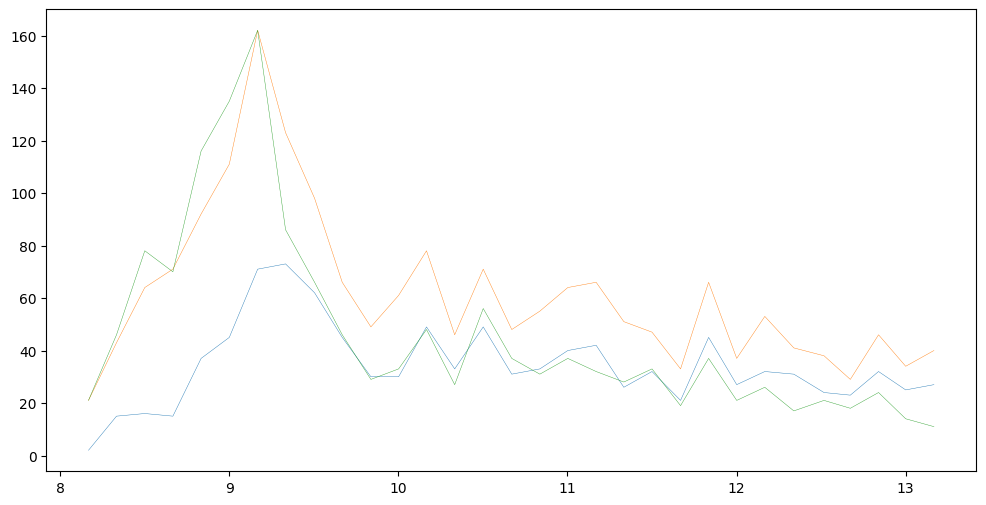

In [ ]:
can = input('номера кандидатов через пробел: ')
step = int(input('интервал в минутах: '))/60

total = gau_df.sum(axis=0).tolist()                   #Общее количество голосов за кандидата

if ' ' in can:
  can = can.split(' ')
  for i in range(len(can)):
    can[i] = int(can[i]) -1                           #!!!!!!! минус один из кандидата уже тут
else:
  c = []
  c.append(int(can) - 1)
  can = c

graph_data = []
for k in can:
  count = 8.0 + step
  v = 0
  vote = []
  for t in gau_df.index:
    ca = gau_df.columns.tolist()[k]
    if t < count:
      v = v + gau_df.loc[t][ca]
    else:
      v = v + gau_df.loc[t][ca]
      count = count + step
      vote.append([t, v])
      v = 0
  graph_data.append(vote)

tit = gau_df.columns.tolist()[can[0]] + ' (' + str(total[can[0]]) + ')'
for i in range(len(can) - 1):
  i = i + 1
  tit = tit + '\n' + gau_df.columns.tolist()[can[i]] + ' (' + str(total[can[i]]) + ')'

plt.figure(figsize=(12,6))

for i, dataset in enumerate(graph_data):
    x, y = zip(*dataset)
    plt.plot(x, y, linewidth = 0.3, label= gau_df.columns.tolist()[can[i]])
    #plt.legend(loc = 'upper right')

#marker = 'o', label= gau_df.columns.tolist()[can[i]]
#plt.title(tit)

plt.show()


In [ ]:
total = gau_df.sum(axis=0)
total.sort_values(inplace = True, ascending=False)
print(total)

gist = gau_df.sum(axis=1).values.tolist()


Гудименко Юрій Володимирович          1926
Ярова Богдана Едуардовна              1436
Соловйов Микита Олександрович         1079
Чернов Олег Валерійович               1013
Бріт Ореста Павлівна                   983
Шуба Анастасія Вадимівна               978
Штанков Микита Володимирович           971
Нишпорка Олена Іванівна                954
Ніколаєнко Тетяна Володимирівна        920
Костецький Максим Юрійович             874
Трегуб Олена Миколаївна                869
Біщук Віктор Павлович                  780
Даценко Катерина Андріївна             771
Прудковських Віктор Вячеславович       736
Масюк Віталій Володимирович            730
Микитюк Антон Сергійович               726
Кривошея Генадій Григорович            685
Геращенко Олександр Вролодимирович     651
Рябенкo Євгенія Олександрівна          466
Девченко Вячеслав Васильович           431
Слесаренко Євгеній Ігорович            429
Рибалка Тетяна Сергіївна               422
Корольов Ігор Сергійович               422
Юрченок Анн

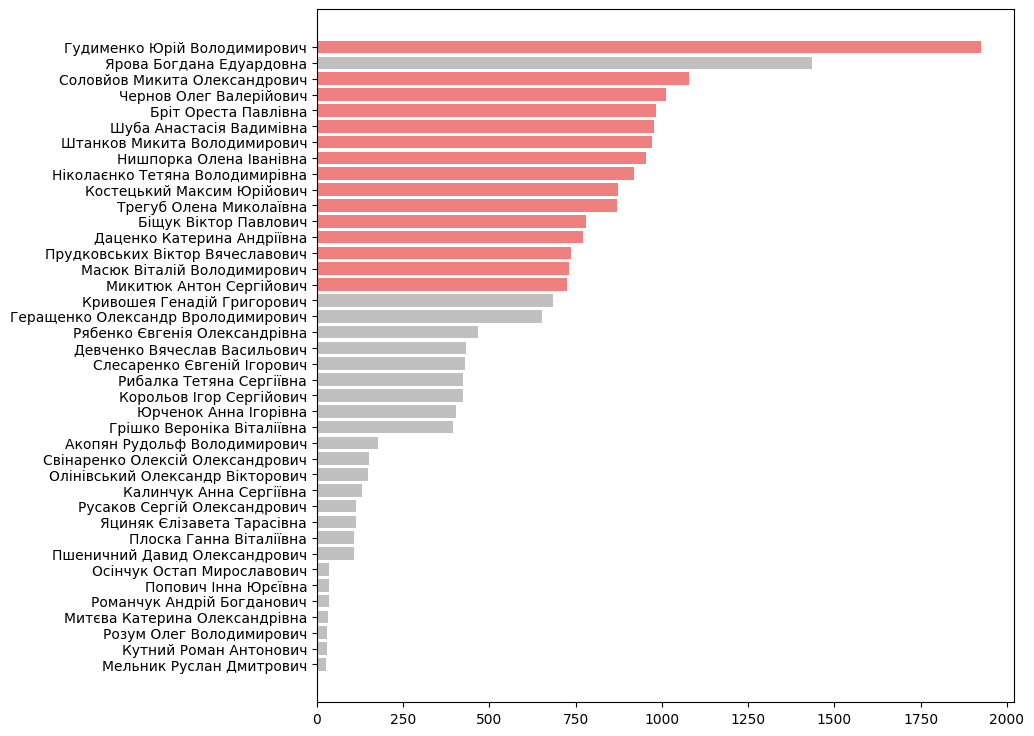

In [ ]:
col = []
our_names = []
for i in ours:
  our_names.append(gau_df.columns.tolist()[i - 1])

for i in range(len(total.index.tolist())):
  if total.index.tolist()[i] in our_names:
    col.append('LightCoral')
  else:
    col.append('silver')

col.reverse()


fig, ax = plt.subplots(figsize=(9,9))

xi = list(reversed(total.index.tolist()))
yi = list(reversed(total.values.tolist()))

x = xi
y = yi

plt.barh(x, y, color = col)
plt.show()

[343, 225, 271, 171, 148, 84, 57, 53, 73, 177, 79, 45, 42, 67, 776]


<BarContainer object of 15 artists>

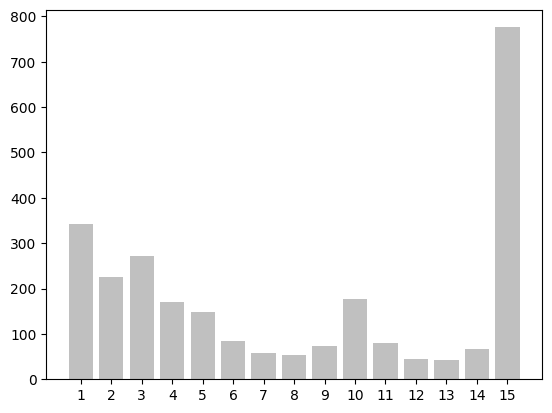

In [ ]:
vote_gist = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ]
for i in range(15):
  for v in gist:
    if v == i + 1:
      vote_gist[i] = vote_gist[i] + 1

xj = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
print(vote_gist)

fig, axes = plt.subplots()
x = xj
y =vote_gist

axes.bar(x, y, color = 'silver', alpha = 1.0, label = 'vertical bar')

Список номеров кандидатов через пробел:  2 37


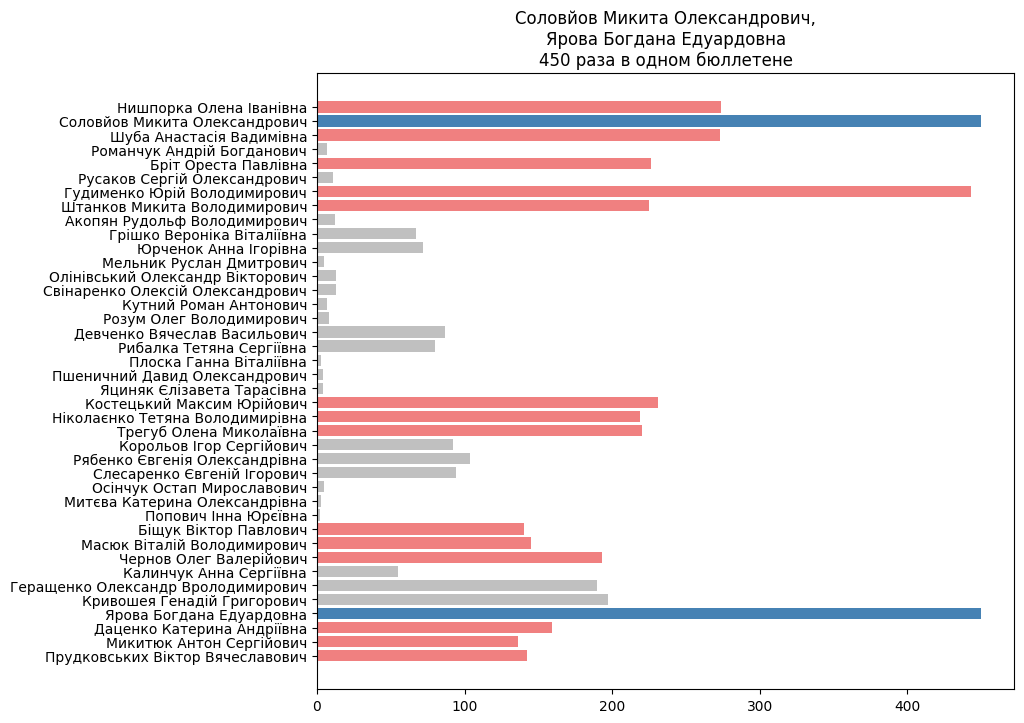

In [ ]:
can = input('Список номеров кандидатов через пробел:  ')

can_int = []
if ' ' in can:
  can = can.split(' ')
  for i in range(len(can)):
    can_int.append(int(can[i]) - 1)                           #!!!!!!! минус один из кандидата уже тут
else:
  can_int.append(int(can) - 1)

can = []
for i in range(len(can_int)):
  can.append(gau_df.columns.tolist()[can_int[i]])

count = 0
group = np.zeros(40)

for i in gau_df.index:
  for j in can:
    if gau_df.loc[i][j] == 0:
      check = False
      break
    else:
      check = True
  if check == True:
    count += 1
    group = group + np.array(gau_df.loc[i])


yi = group
xi = gau_df.columns.tolist()


tit = can[0]
for i in range(len(can) - 1):
  i = i + 1
  tit = tit + ',\n' + can[i]

col = []
for i in range(40):
  if i + 1 in ours:
    col.append('LightCoral')
  else:
    col.append('silver')
  if i in can_int:
    col[i] = 'SteelBlue'
col.reverse()

#print('за группу кандидатов: \n\n' + tit + '\n\nпроголосовали ' + str(count) + ' раз' + '\nпри этом проголосовали за (раз):\n')
#for i in range(len(xi)):
#  print(str(yi[i]) + '\t' + xi[i])

tit = tit + '\n' + str(count) + ' раза в одном бюллетене'

fig, ax = plt.subplots(figsize=(9,8))

xi = list(reversed(xi))
yi = list(reversed(yi))

x = xi
y = yi

plt.barh(x, y, color = col)
plt.title(tit)
plt.show()


номера кандидатов через пробел: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
интервал в минутах: 1


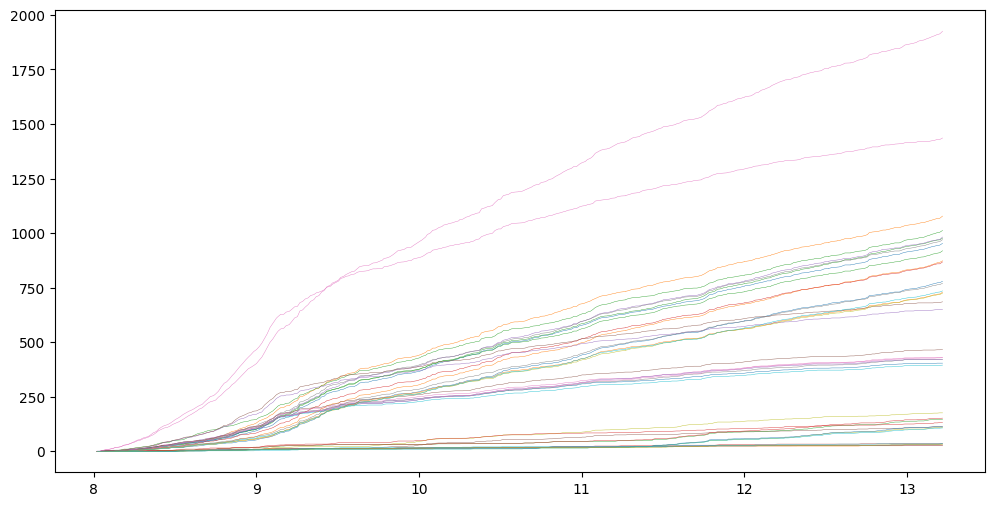

In [ ]:
can = input('номера кандидатов через пробел: ')
step = int(input('интервал в минутах: '))/60

total = gau_df.sum(axis=0).tolist()                   #Общее количество голосов за кандидата

if ' ' in can:
  can = can.split(' ')
  for i in range(len(can)):
    can[i] = int(can[i]) -1                           #!!!!!!! минус один из кандидата уже тут
else:
  c = []
  c.append(int(can) - 1)
  can = c

graph_data = []
for k in can:
  count = 8.0 + step
  v = 0
  vote = []
  for t in gau_df.index:
    ca = gau_df.columns.tolist()[k]
    if t < count:
      v = v + gau_df.loc[t][ca]
    else:
      v = v + gau_df.loc[t][ca]
      count = count + step
      vote.append([t, v])
      #v = 0
  graph_data.append(vote)

tit = gau_df.columns.tolist()[can[0]] + ' (' + str(total[can[0]]) + ')'
for i in range(len(can) - 1):
  i = i + 1
  tit = tit + '\n' + gau_df.columns.tolist()[can[i]] + ' (' + str(total[can[i]]) + ')'

plt.figure(figsize=(12,6))

for i, dataset in enumerate(graph_data):
    x, y = zip(*dataset)
    plt.plot(x, y, linewidth = 0.3) #, label= gau_df.columns.tolist()[can[i]]
    #plt.legend(loc = 'upper left')


#plt.title(tit)

plt.show()

номера кандидатов через пробел: 2 7 37 32 39 40
интервал в минутах: 10
[[[8.168139499999999, 0.0018535681186283596], [8.333878166666667, 0.013901760889712697], [8.501015, 0.014828544949026877], [8.667078, 0.013901760889712697], [8.833985666666667, 0.03429101019462465], [9.000747, 0.04170528266913809], [9.168443833333333, 0.06580166821130677], [9.33342, 0.06765523632993513], [9.504937166666666, 0.057460611677479144], [9.668435833333334, 0.04170528266913809], [9.8378945, 0.027803521779425393], [10.001811833333333, 0.027803521779425393], [10.166738833333334, 0.04541241890639481], [10.333407166666667, 0.030583873957367932], [10.502105833333333, 0.04541241890639481], [10.6708535, 0.028730305838739572], [10.836902666666667, 0.030583873957367932], [11.002219166666666, 0.03707136237256719], [11.169790166666665, 0.03892493049119555], [11.333490333333334, 0.024096385542168676], [11.500211, 0.029657089898053754], [11.668958, 0.019462465245597776], [11.834878833333335, 0.04170528266913809], [12.00

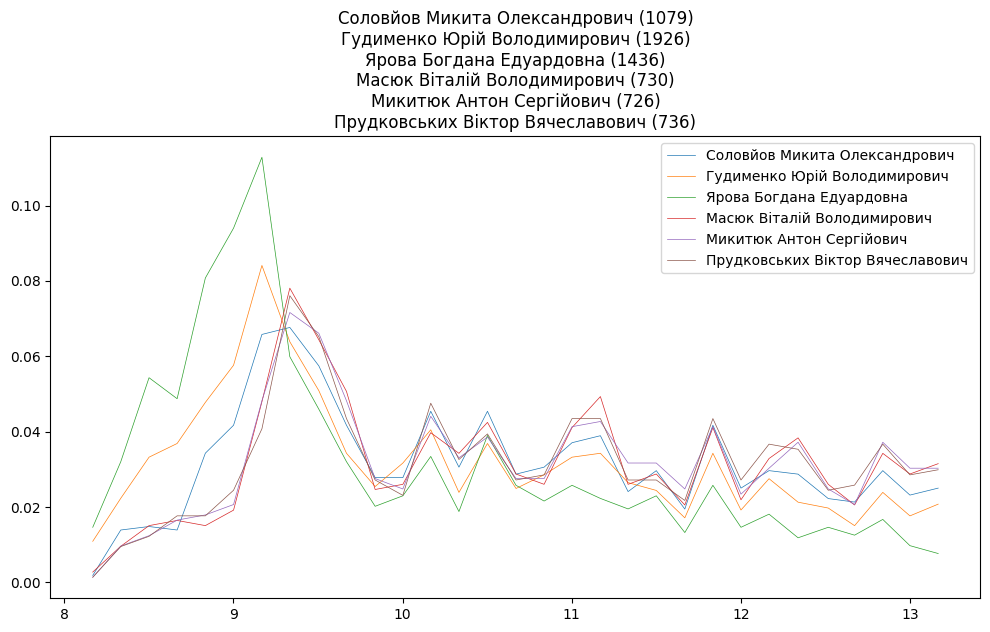

In [ ]:
### с нормировокй (разделить на общее количество голосов за каждого кандидата)

can = input('номера кандидатов через пробел: ')
step = int(input('интервал в минутах: '))/60

total = gau_df.sum(axis=0).tolist()                   #Общее количество голосов за кандидата

if ' ' in can:
  can = can.split(' ')
  for i in range(len(can)):
    can[i] = int(can[i]) -1                           #!!!!!!! минус один из кандидата уже тут
else:
  c = []
  c.append(int(can) - 1)
  can = c

graph_data = []
for k in can:
  count = 8.0 + step
  v = 0
  vote = []

  for t in gau_df.index:
    ca = gau_df.columns.tolist()[k]
    if t < count:
      v = v + gau_df.loc[t][ca]
    else:
      v = (v + gau_df.loc[t][ca])/total[k]
      count = count + step
      vote.append([t, v])
      v = 0
  graph_data.append(vote)


print(graph_data)


tit = gau_df.columns.tolist()[can[0]] + ' (' + str(total[can[0]]) + ')'
for i in range(len(can) - 1):
  i = i + 1
  tit = tit + '\n' + gau_df.columns.tolist()[can[i]] + ' (' + str(total[can[i]]) + ')'

plt.figure(figsize=(12,6))

for i, dataset in enumerate(graph_data):
    x, y = zip(*dataset)
    plt.plot(x, y, linewidth = 0.5, label= gau_df.columns.tolist()[can[i]])
    plt.legend(loc = 'upper right')

#marker = 'o', label= gau_df.columns.tolist()[can[i]]
plt.title(tit)

plt.show()

номера кандидатов через пробел: 2 7 37
интервал в минутах: 15


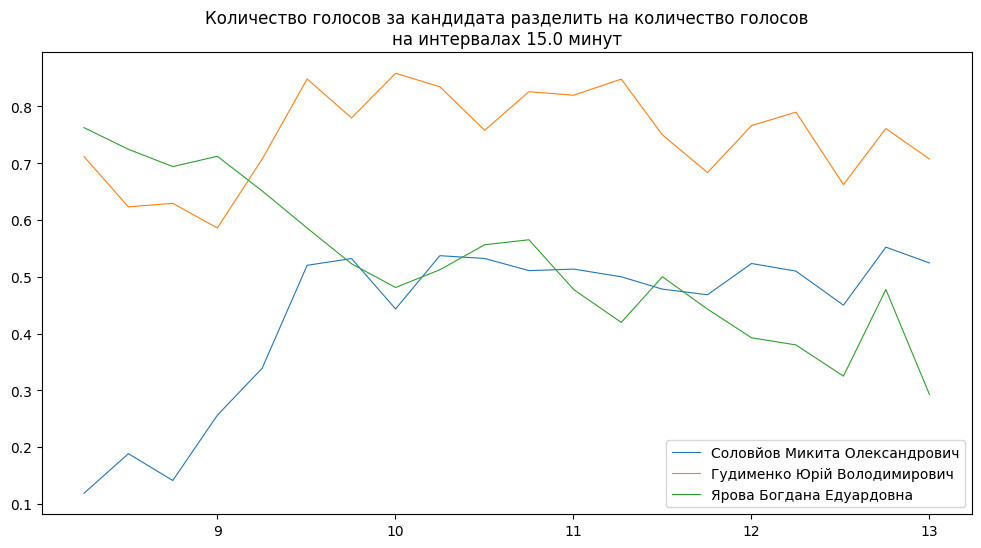

In [ ]:
### с нормировокй (разделить количество проголосовавших за интервал)

can = input('номера кандидатов через пробел: ')
step = int(input('интервал в минутах: '))/60

total_time = gau_df.sum(axis=1).tolist()                   #Общее количество голосов за кандидата

if ' ' in can:
  can = can.split(' ')
  for i in range(len(can)):
    can[i] = int(can[i]) -1                           #!!!!!!! минус один из кандидата уже тут
else:
  c = []
  c.append(int(can) - 1)
  can = c

graph_data = []
for k in can:
  count = 8.0 + step
  v = 0
  vote = []
  nu = 0
  for t in gau_df.index:
    ca = gau_df.columns.tolist()[k]
    if t < count:
      v = v + gau_df.loc[t][ca]
      nu += 1
    else:
      nu +=1
      count = count + step
      v = (v + gau_df.loc[t][ca])/nu
      vote.append([t, v])
      v = 0
      nu = 0
  graph_data.append(vote)


tit = 'Количество голосов за кандидата разделить на количество проголосовавших\nна интервалах ' + str(step*60) + ' минут'

plt.figure(figsize=(12,6))

for i, dataset in enumerate(graph_data):
    x, y = zip(*dataset)
    plt.plot(x, y, linewidth = 0.8, label= gau_df.columns.tolist()[can[i]])
    plt.legend(loc = 'lower right')

#marker = 'o', label= gau_df.columns.tolist()[can[i]]
plt.title(tit)

plt.show()


номера кандидатов через пробел: 2 7 37
интервал в минутах: 15


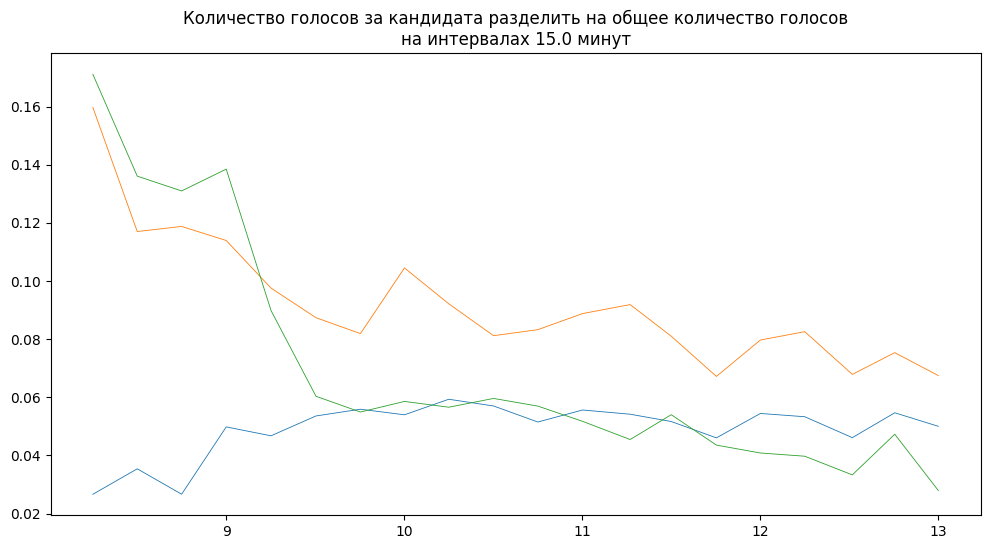

In [ ]:
### с нормировокй (разделить количество отданных голосов за интервал)

can = input('номера кандидатов через пробел: ')
step = int(input('интервал в минутах: '))/60

total_time = gau_df.sum(axis=1).tolist()                   #Общее количество голосов за кандидата

if ' ' in can:
  can = can.split(' ')
  for i in range(len(can)):
    can[i] = int(can[i]) -1                           #!!!!!!! минус один из кандидата уже тут
else:
  c = []
  c.append(int(can) - 1)
  can = c

graph_data = []
for k in can:
  count = 8.0 + step
  v = 0
  vote = []
  nu_vot = 0
  l = 0
  for t in gau_df.index:
    ca = gau_df.columns.tolist()[k]
    if t < count:
      nu_vot += total_time[l]
      v = v + gau_df.loc[t][ca]
      l +=1
    else:
      nu_vot += total_time[l]
      count = count + step
      v = (v + gau_df.loc[t][ca])/nu_vot
      vote.append([t, v])
      v = 0
      l +=1
      nu_vot = 0

  graph_data.append(vote)

tit = gau_df.columns.tolist()[can[0]] + ' (' + str(total[can[0]]) + ')'
#for i in range(len(can) - 1):
#  i = i + 1
#  tit = tit + '\n' + gau_df.columns.tolist()[can[i]] + ' (' + str(total[can[i]]) + ')'

tit = 'Количество голосов за кандидата разделить на общее количество голосов\nна интервалах ' + str(step*60) + ' минут'

plt.figure(figsize=(12,6))

for i, dataset in enumerate(graph_data):
    x, y = zip(*dataset)
    plt.plot(x, y, linewidth = 0.6, label= gau_df.columns.tolist()[can[i]])
    #plt.legend(loc = 'upper right')

#marker = 'o', label= gau_df.columns.tolist()[can[i]]
plt.title(tit)

plt.show()


номера кандидатов через пробел: 1 2 3 5 7 8 22 23 24 31 32 33 38 39 40
интервал в минутах: 15


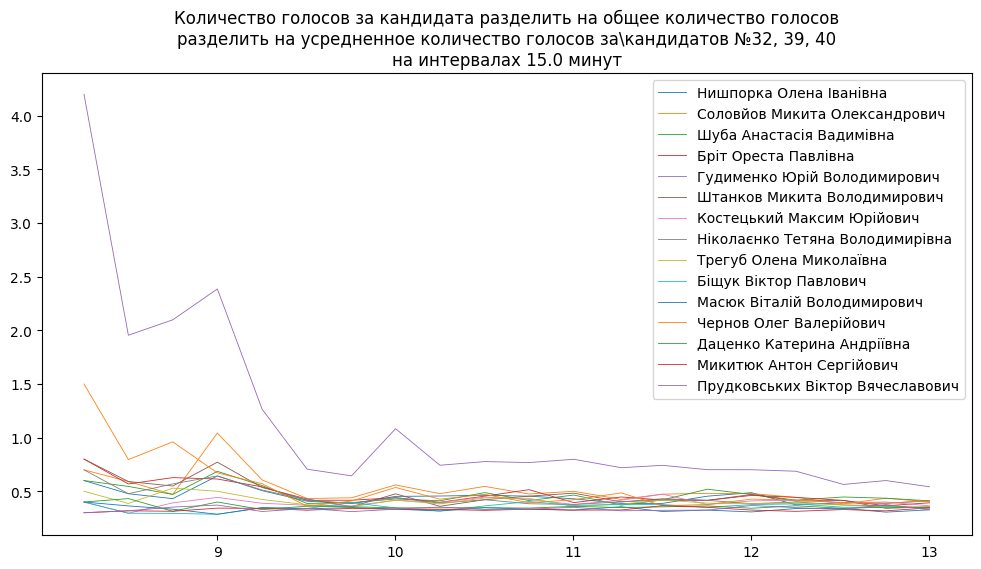

In [ ]:
### с нормировокй (разделить количество отданных голосов за интервал) и дополнительной нормировой по последним кандидатам из списка соловьева

can = input('номера кандидатов через пробел: ')
step = int(input('интервал в минутах: '))/60

total_time = gau_df.sum(axis=1).tolist()                   #Общее количество голосов за кандидата

if ' ' in can:
  can = can.split(' ')
  for i in range(len(can)):
    can[i] = int(can[i]) -1                           #!!!!!!! минус один из кандидата уже тут
else:
  c = []
  c.append(int(can) - 1)
  can = c

norm = [31, 38, 39]

norm_data = []
for k in norm:
  count = 8.0 + step
  v = 0
  vote = []
  nu_vot = 0
  l = 0
  for t in gau_df.index:
    ca = gau_df.columns.tolist()[k]
    if t < count:
      #nu_vot += total_time[l]
      v = (v + gau_df.loc[t][ca])
      #l +=1
    else:
      #nu_vot += total_time[l]
      count = count + step
      v = (v + gau_df.loc[t][ca])
      vote.append([t, v])
      v = 0
      #l +=1
      #nu_vot = 0

  norm_data.append(vote)

normalize = []
for j in range(len(norm_data[0])):
  normalize.append(norm_data[0][j][1] + norm_data[1][j][1] + norm_data[2][j][1])


graph_data = []
for k in can:
  count = 8.0 + step
  v = 0
  vote = []
  nu_vot = 0
  l = 0
  n = 0
  for t in gau_df.index:
    ca = gau_df.columns.tolist()[k]
    if t < count:
      nu_vot += total_time[l]
      v = (v + gau_df.loc[t][ca])
      l +=1
    else:
      nu_vot += total_time[l]
      count = count + step
      v = (v + gau_df.loc[t][ca])/normalize[n]
      vote.append([t, v])
      v = 0
      l +=1
      n += 1
      nu_vot = 0

  graph_data.append(vote)

tit = gau_df.columns.tolist()[can[0]] + ' (' + str(total[can[0]]) + ')'
#for i in range(len(can) - 1):
#  i = i + 1
#  tit = tit + '\n' + gau_df.columns.tolist()[can[i]] + ' (' + str(total[can[i]]) + ')'

tit = 'Количество голосов за кандидата разделить на общее количество голосов\nразделить на усредненное количество голосов за кандидатов №32, 39, 40\nна интервалах ' + str(step*60) + ' минут'

plt.figure(figsize=(12,6))

for i, dataset in enumerate(graph_data):
    x, y = zip(*dataset)
    plt.plot(x, y, linewidth = 0.6, label= gau_df.columns.tolist()[can[i]])
    plt.legend(loc = 'upper right')

#marker = 'o', label= gau_df.columns.tolist()[can[i]]
plt.title(tit)

plt.show()

In [ ]:
print(norm_data[0])


[[8.251735333333333, 4], [8.501015, 16], [8.7502545, 17], [9.000747, 20], [9.252238, 59], [9.504937166666666, 80], [9.754384333333334, 46], [10.001811833333333, 28], [10.250462833333334, 43], [10.502105833333333, 42], [10.750732166666667, 33], [11.002219166666666, 37], [11.269136333333334, 47], [11.500211, 29], [11.753684666666667, 25], [12.000966333333333, 36], [12.250214666666666, 39], [12.517095333333334, 32], [12.7553935, 26], [13.000119666666667, 35]]
